A few of the data Sources:

http://planningcommission.gov.in/data/datatable/index.php?data=datatab

http://data.gov.in

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = pd.DataFrame(pd.read_csv('india_rural.txt',sep='\t',skiprows=(0),header=(0),low_memory=False))

In [5]:
# as a % of state population and gdp values
rural_pop = 0.65
rural_gdp = 0.3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10249 entries, 0 to 10248
Columns: 561 entries, household_id to elec_dm
dtypes: float64(365), int64(61), object(135)
memory usage: 43.9+ MB


In [7]:
df.head()

,household_id,q002_supervisor,q000_interviewer_id,q001_interviewer,q003_date,q004_time,q006_state_code,q007_state,q008_district_code,q009_district,q010_block,q011_village_code,q012_village,q013_hamlet,q101_survey_taken,q101_survey_none_reason,q102_decisionmakerYN,q201_gender,q202_age,q203_married,q204_adults,q205_adult_females,q205_a_working_females,q206_children,q206_a_children_male,q206_b_children_abv14,q207_ppl_studying,q208_edu,q209_religion,q209_religion_other,q210_caste,q210_caste_other,q211_ration_card,q212_income_source,q212_income_source_other,q213_bankac,q214_hh_expenses,q215_annual_income,q215_hh_indebted,q216_a_hh_debt,q217_decisionmakers,q217_decisionmakers_others,q218_land_ownership,q218_a_land_owned,q218_a_land_units,q219_house_owned,q220_house_type,q221_a_room,q221_b_bicycle,q221_c_motorcycle,q221_d_tractor_car,q221_e_toilets,q222_cooking_fuels_1,q222_cooking_fuels_2,q222_cooking_fuels_3,q222_cooking_fuels_4,q222_cooking_fuels_others,q223_a_cow.buffalo,q223_b_fowls_chickens,q223_c_goats,q224_business_interests,q224_a_business_barriers,q224_a_business_barriers_1,q224_a_business_barriers_2,q224_a_business_barriers_3,q224_a_business_barriers_4,q224_a_business_barriers_others,q301_grid_use,q301_a_grid_hamlet,q301_b_no_grid_reason1,q301_b_no_grid_reason2,q301_b_no_grid_reason3,q301_b_no_grid_reason4,q301_b_no_grid_reason5,q301_b_no_grid_reason6,q301_b_no_grid_reason7,q301_b_no_grid_reason_others,q301_c_dist_pole,q302_grid_years,q302_grid_months,q303_grid_initial_cost,q304_grid_meter,q305_grid_bill_freq,q305_grid_bill_freq_other,q305_a_grid_bill_type,q306_grid_bill_avail,q306_a_grid_bill_MMYY,q306_b_grid_bill_days,q306_c_grid_bill_amt1,q306_d_grid_bill_units,q307_grid_bill_amt2,q308_grid_hours,q309_grid_hours_eve,q310_grid_nopower,q311_grid_app_damage,q312_grid_vol_low,q316_shs_heard,q317_shs_use,q318_shs_brand,q319_shs_years,q319_shs_months,q320_shs_watt,q321_shs_cost,q322_shs_hours,q324_battery_use,q325_battery_brand_L,q326_battery_ah,q327_battery_cost,q328_battery_charge_mode,q328_battery_charge_mode1,q328_battery_charge_mode2,q328_battery_charge_mode3,q328_battery_charge_mode_others,q329_battery_charge_freq,q330_battery_charge_cost,q331_battery_hours,q334_mgrid_heard,q334_a_mgrid_heard_source1,q334_a_mgrid_heard_source2,q334_a_mgrid_heard_source3,q334_a_mgrid_heard_source4,q334_a_mgrid_heard_source5,q334_a_mgrid_heard_source6,q334_a_mgrid_heard_source7,q334_a_mgrid_heard_source8,q334_a_mgrid_heard_sourceother,q335_mgrid_use,q335_a_mgrid_hamlet,q335_b_mgrid_use_before,q335_c_mgrid_reason_no_use1,q335_c_mgrid_reason_no_use2,q335_c_mgrid_reason_no_use3,q335_c_mgrid_reason_no_use4,q335_c_mgrid_reason_no_use5,q335_c_mgrid_reason_no_useother,q336_mgrid_years,q336_mgrid_months,q337_mgrid_initial_cost,q338_mgrid_meter,q339_mgrid_bill_type,q340_mgrid_bill_avail,q340_a_mgrid_bill_MMYY,q340_b_mgrid_bill_days,q340_c_mgrid_bill_amt1,q340_d_mgrid_bill_units,q340_e_mgrid_bill_amt2,q341_mgrid_hours,q345_dg_use,q346_dg_hours,q347_dg_per1_connec2,q347_dg_connec2_expense,q347_dg_per1_cost,q348_dg_per1_diesel_amt,q349_dg_per1_disel_price,q350_dg_per1_disel_dist,q351_dg_per1_disel_repaircost,q352_elec_primary_source,q353_elec_satisfied_,q401_kero_use_,q401_a_kero_noreason,q401_a_kero_noreason1,q401_a_kero_noreason2,q401_a_kero_noreason3,q401_a_kero_noreason4,q401_a_kero_noreason5,q401_a_kero_noreason6,q401_a_kero_noreasonother,q402_kero_purpose,q402_kero_purpose1,q402_kero_purpose2,q402_kero_purpose3,q402_kero_purpose4,q402_kero_purposeother,q403_kero_pds_ltr,q404_kero_pds_price,q405_kero_market_YN,q405_a_kero_marketltr,q405_b_kero_marketprice,q406_kero_wicks,q407_kero_lanterns,q408_kero_hours_total,q409_kero_nonlightuse_ltr,q410_kero_harmful,q411_sl_heard,q412_sl_use,q413_a_sl_years,q413_b_sl_months,q414_sl_number,q415_sl_cost_total,q416_a_sl_hours_home,q416_b_sl_hours_outside,q417_light_othersources,q417_light_othersources1,q417_light_othersources2,q417_light_othersources3,q417_light_othersources4,q418_light_othersources_hours,q419

In [8]:
cols = df.columns.tolist()

In [9]:
len(cols)

561

In [10]:
no_value_cols = df.columns[(df.isnull()).all()]

In [11]:
len(no_value_cols)

71

In [12]:
df.drop(df[no_value_cols],axis=1,inplace=True)

In [13]:
len(df.columns)

490

In [14]:
cols_to_drop =['q002_supervisor','q000_interviewer_id','q001_interviewer','q004_time','q010_block','q209_religion',
               'q210_caste','q210_caste_other']

In [15]:
df.drop(columns=cols_to_drop,axis=1,inplace=True)

In [16]:
# cleaning up columns names
new_col_names = []
for col in df.columns:
    if col =='household_id':
        pass
    else:
        col = col.lstrip(col[:5])
        new_col_names.append(col)
        
new_col_names.insert(0,'household_id')

In [17]:
df.columns = new_col_names

In [18]:
cooking_fuels = ['cooking_fuels_1', 'cooking_fuels_2', 'cooking_fuels_3','cooking_fuels_others']

In [19]:
df_grid_use = pd.DataFrame(df[['state','grid_use','grid_hours','mgrid_use']])

In [20]:
df_grid_use.drop(columns='mgrid_use',axis=1,inplace=True)

In [21]:
# no. of hours of power for those connected to grid
hours_grid = df_grid_use[df_grid_use['grid_use'] == 1]

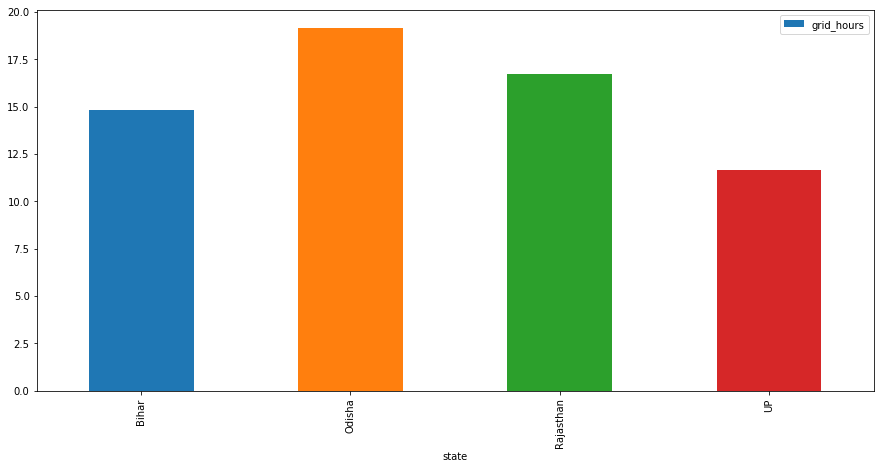

In [22]:
# Avg. no. of hours of electricity per day through grid
fig2, ax2 = plt.subplots(figsize=(15,7))

hours_grid.groupby('state')['grid_hours'].mean().plot(kind='bar',ax=ax2)
ax2.legend(loc='upper right')

In [157]:
demand_variables =['hh_expenses','income_source','grid_initial_cost',
                  'grid_bill_amt2','annual_income', 'appl_used1','appl_want1','edu']


In [63]:
#df['elec_appl'] = df['H_a_num_tv'] + df['I_a_num_cooler'] + df['J_a_num_elec_stove'] + df['K_a_num_comp_laptop'] + df['L_a_num_fridge'] + df['N_a_num_grinder']+ df['S_a_num_water_pump']

In [23]:
primary_features = ['household_id','state','gender','age','adults','children','edu','hh_expenses','annual_income','hh_indebted',
                   'business_interests','grid_use','grid_initial_cost','d_grid_bill_units','c_grid_bill_amt1','grid_bill_amt2',
                    'grid_hours','grid_nopower','mgrid_use','mgrid_initial_cost']

In [ ]:
#appl = ['H_a_num_tv','I_a_num_cooler',
 #                   'J_a_num_elec_stove','K_a_num_comp_laptop','L_a_num_fridge','N_a_num_grinder','S_a_num_water_pump']

In [24]:
df_primary = pd.DataFrame(df[primary_features])

In [25]:
df_primary =  df_primary.loc[:,~df_primary.columns.duplicated()]

In [26]:
df_primary.fillna(0,inplace=True)

In [114]:
#df_primary['elec_appl_num']= df['H_a_num_tv'] + df['I_a_num_cooler'] + df['J_a_num_elec_stove'] + df_primary['K_a_num_comp_laptop'] + df_primary['L_a_num_fridge'] + df_primary['N_a_num_grinder']+ df_primary['S_a_num_water_pump']

In [120]:
#df_primary.drop(columns=['H_a_num_tv','I_a_num_cooler','J_a_num_elec_stove','K_a_num_comp_laptop',
 #                        'L_a_num_fridge','N_a_num_grinder','S_a_num_water_pump','elec_appl_num'],inplace=True)

In [27]:
df_primary.head()

,household_id,state,gender,age,adults,children,edu,hh_expenses,annual_income,hh_indebted,business_interests,grid_use,grid_initial_cost,d_grid_bill_units,c_grid_bill_amt1,grid_bill_amt2,grid_hours,grid_nopower,mgrid_use,mgrid_initial_cost
0,104889,Rajasthan,0,30,5,7,2,15000.00,100000.00,1,1,1,700.00,73.00,710.00,0.00,22.00,0.00,0,0
1,104915,Rajasthan,0,61,3,0,6,7000.00,120000.00,0,1,1,0.00,0.00,0.00,500.00,23.00,0.00,0,0
2,104996,Rajasthan,0,45,3,3,2,5000.00,100000.00,0,1,1,21.00,0.00,0.00,1500.00,24.00,0.00,0,0
3,105012,Rajasthan,0,40,2,3,3,5000.00,60000.00,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0
4,104994,Rajasthan,0,40,4,1,2,5000.00,90000.00,1,1,1,0.00,0.00,0.00,500.00,20.00,0.00,0,0


In [29]:
df_primary['grid_bill_avg'] = (df_primary['c_grid_bill_amt1'] + df_primary['grid_bill_amt2'])/2

In [30]:
df_primary = df_primary[df_primary.grid_bill_avg < 10000]

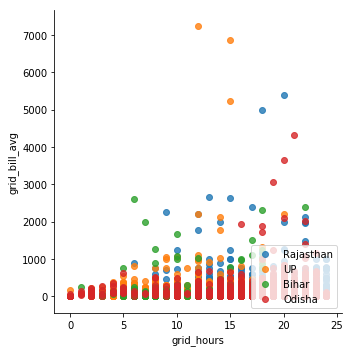

In [31]:
import seaborn as sns
sns.lmplot( x='grid_hours', y="grid_bill_avg", data=df_primary, fit_reg=False, hue='state', legend=False)
plt.legend(loc='lower right')


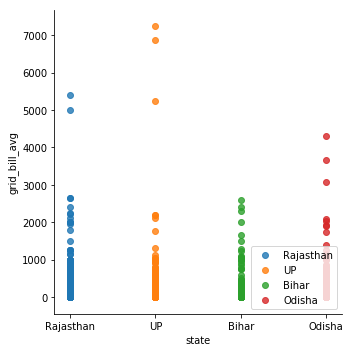

In [32]:
sns.lmplot( y='grid_bill_avg', x="state", data=df_primary, fit_reg=False, hue='state', legend=False)
plt.legend(loc='lower right')


In [81]:
# get the capacity data

df_capacity = pd.DataFrame(pd.read_csv('statewise installed capacity NEW.csv'))

In [83]:
pos = [0,1,2,31,32,40,41,42,43,44,45]
df_capacity.drop(df_capacity.index[pos], inplace=True)

In [84]:
capacity_cols = ['State','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']

In [85]:
df_capacity.columns = capacity_cols

In [86]:
#df_capacity.reset_index(drop=True,inplace=True)
df_capacity.head()

,State,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3,1 Andhra Pradesh,"5,876","6,179","6,479","6,639","6,640","6,939","7,090",7334.70,7097.9,7688.0,8481.90
4,2 Arunachal Pradesh,45,45,46,34,34,60,69,61.10,61.1,83.0,94.70
5,3 Assam,597,597,597,597,597,597,697,421.80,446.8,447.0,446.80
6,4 Bihar,"1,988",598,598,598,598,629,604,590.40,590.4,585.0,588.30
7,5 Chhattisgarh,NaN,"1,400","1,400","1,400","1,400","1,411","1,668",1918.10,2058.1,2199.0,2199.10


In [87]:
df_capacity.to_csv(r'df_Capacity_clean.csv',index=False)

In [88]:
df_capacity.fillna(0,inplace=True)

In [124]:
df_cap = pd.DataFrame(pd.read_csv("Installed_Capacity.csv"))

In [128]:
cap_cols = df_cap.columns
cap_cols_new = []
for col in cap_cols:
    if col=='Year':
        continue
    else:
        col = col.lstrip(col[:2])
        cap_cols_new.append(col)
        
cap_cols_new.insert(0,'Year')
        

In [129]:
df_cap.columns = cap_cols_new

In [139]:
cols_subset=['Year','Bihar',' Uttar Pradesh',' Rajasthan',' Orissa']

In [140]:
df_state_cap = pd.DataFrame(df_cap[cols_subset])

In [141]:
df_state_cap.groupby('')

,Year,Bihar,Uttar Pradesh,Rajasthan,Orissa
0,2001,1988.00,5613.00,2489.00,2297.00
1,2002,598.00,4659.00,2992.00,2297.00
2,2003,598.00,4626.00,3067.00,2303.00
3,2004,598.00,4621.00,3509.00,2299.00
4,2005,598.00,4621.00,3549.00,2320.00
5,2006,629.00,4810.00,3776.00,2345.00
6,2007,604.00,4933.00,3788.00,2345.00
7,2008,590.40,4928.60,4006.90,2495.20
8,2009,590.40,4672.50,4006.90,2520.20
9,2010,585.00,4621.20,4827.00,2546.00


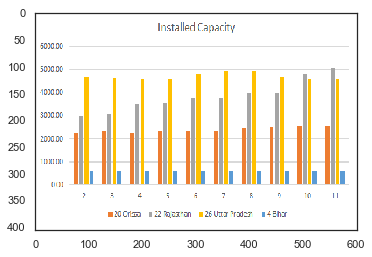

In [159]:
from pylab import imread,subplot,imshow,show

image = imread('capacity.png')
plt.imshow(image)


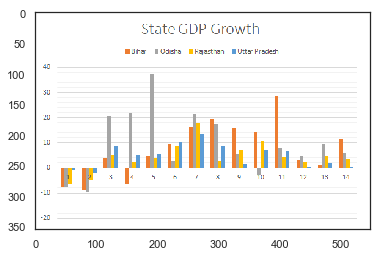

In [170]:
image2 = imread('state_gdp.png')
plt.imshow(image2)


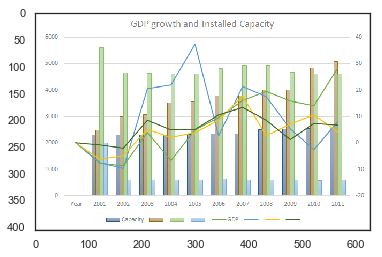

In [171]:
image3 = imread('gdp_cap.png')
plt.imshow(image3)


In [160]:
df_gdp = pd.DataFrame(pd.read_csv(r'statewise_gdp_growth_industry sector.csv'))

In [164]:
df_gdp.head()

,States/UTs,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Unnamed: 15
0,A & Nicobar Islands,-16.11,-16.09,-8.10,49.20,-1.46,18.30,41.08,17.06,-16.31,-0.12,4.12,0.70,6.16,1.62,nan
1,Andhra Pradesh,-2.30,6.35,12.14,6.29,3.95,10.05,17.60,10.87,7.15,3.04,9.97,11.43,-0.46,2.44,nan
2,Arunachal Pradesh,-1.75,-7.88,25.31,84.81,13.75,4.54,-2.87,16.84,22.76,-6.85,11.97,-2.44,15.28,9.64,nan
3,Assam,-8.01,5.05,22.91,9.51,6.79,-3.53,-0.06,0.68,6.92,8.82,1.61,3.53,3.34,4.28,nan
4,Bihar,-7.70,-8.73,3.90,-6.57,4.96,9.60,16.18,19.47,15.89,14.07,28.44,3.12,0.95,11.53,nan


In [165]:
df_gdp.drop(columns='Unnamed: 15',inplace=True)

In [173]:
gdp_vs_capacity = pd.DataFrame(pd.read_csv('gdp_vs_capacity.csv'))

In [174]:
gdp_vs_capacity.head()

,Year,Bihar_gdp,Odisha_gdp,Rajasthan_gdp,UP_gdp,Odisha,Rajasthan,Uttar Pradesh,Bihar
0,2001,-7.70,-7.52,-6.27,-0.85,2297.00,2489.00,5613.00,1988.00
1,2002,-8.73,-9.64,-4.74,-2.04,2297.00,2992.00,4659.00,598.00
2,2003,3.90,20.58,5.18,8.57,2303.00,3067.00,4626.00,598.00
3,2004,-6.57,21.93,2.12,5.00,2299.00,3509.00,4621.00,598.00
4,2005,4.96,37.46,3.93,5.23,2320.00,3549.00,4621.00,598.00


In [178]:
df_gdp_cap = gdp_vs_capacity


In [180]:
df_gdp_cap.drop(columns='Year',inplace=True)

In [181]:
corr_gdp_cap = df_gdp_cap.corr()

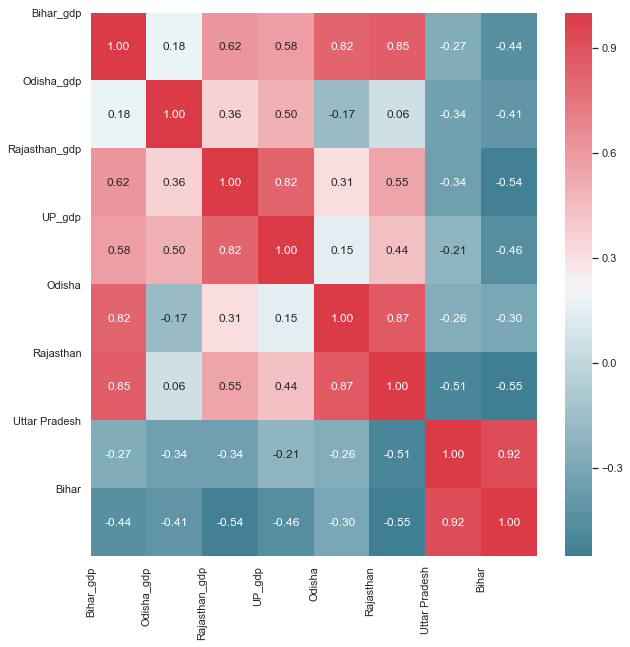

In [182]:
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_gdp_cap, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr_gdp_cap.columns)), corr_gdp_cap.columns);
plt.yticks(range(len(corr_gdp_cap.columns)), corr_gdp_cap.columns)
plt.show()